# KLASIFIKASI JAMUR BERDASARKAN KELAYAKAN KONSUMSI MENGGUNAKAN SUPPORT VECTOR MACHINE

In [3]:
# PROSES IMPORT LIBRARY
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# DATA UNDERSTANDING

In [42]:
# proses pemanggilan data
nurul = pd.read_excel("mushrooms.xlsx")

In [5]:
nurul.head(7).T

,0,1,2,3,4,5,6
class,p,e,e,p,e,e,e
cap-shape,x,x,b,x,x,x,b
cap-surface,s,s,s,y,s,y,s
cap-color,n,y,w,w,g,y,w
bruises,t,t,t,t,f,t,t
odor,p,a,l,p,n,a,a
gill-attachment,f,f,f,f,f,f,f
gill-spacing,c,c,c,c,w,c,c
gill-size,n,b,b,n,b,b,b
gill-color,k,k,n,n,k,n,g


In [8]:
# deskriptif dari data
nurul.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [43]:
nurul.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [12]:
# memeriksa bentuk dataset
nurul.shape

(8124, 23)

In [13]:
# memeriksa tipe data tiap columns dari dataset
nurul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

# DATA PROCESSING

In [53]:
# mengubah data object menjadi integer
labelencoder=LabelEncoder()
for column in nurul.columns:
    nurul[column] = labelencoder.fit_transform(nurul[column])

In [10]:
nurul.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

In [11]:
nurul.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [18]:
# memeriksa duplikat data, jika ada
nurul[nurul.duplicated()].count()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# ANALISIS DATA EKSPLORATIF (ADE)

In [42]:
# deskriptif dari data
nurul.describe().T

,count,mean,std,min,25%,50%,75%,max
class,8124.0,0.482029,0.499708,0.0,0.0,0.0,1.0,1.0
cap-shape,8124.0,3.348104,1.604329,0.0,2.0,3.0,5.0,5.0
cap-surface,8124.0,1.827671,1.229873,0.0,0.0,2.0,3.0,3.0
cap-color,8124.0,4.504677,2.545821,0.0,3.0,4.0,8.0,9.0
bruises,8124.0,0.415559,0.492848,0.0,0.0,0.0,1.0,1.0
odor,8124.0,4.144756,2.103729,0.0,2.0,5.0,5.0,8.0
gill-attachment,8124.0,0.974151,0.158695,0.0,1.0,1.0,1.0,1.0
gill-spacing,8124.0,0.161497,0.368011,0.0,0.0,0.0,0.0,1.0
gill-size,8124.0,0.309207,0.462195,0.0,0.0,0.0,1.0,1.0
gill-color,8124.0,4.810684,3.540359,0.0,2.0,5.0,7.0,11.0


In [19]:
# kategori kelas
nurul['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [22]:
nurul.groupby(["class"]).count().T

class,0,1
cap-shape,4208,3916
cap-surface,4208,3916
cap-color,4208,3916
bruises,4208,3916
odor,4208,3916
gill-attachment,4208,3916
gill-spacing,4208,3916
gill-size,4208,3916
gill-color,4208,3916
stalk-shape,4208,3916


In [61]:
# fungsi untuk membuat labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # panjang column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=-15, fontsize=10)
    ax = sns.countplot(data=data, x=feature, palette="Oranges", 
                       order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", 
                    size=10, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

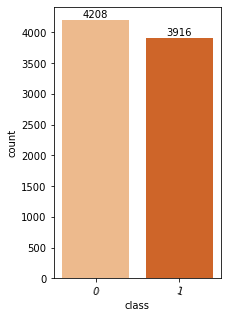

In [62]:
labeled_barplot(nurul, "class")

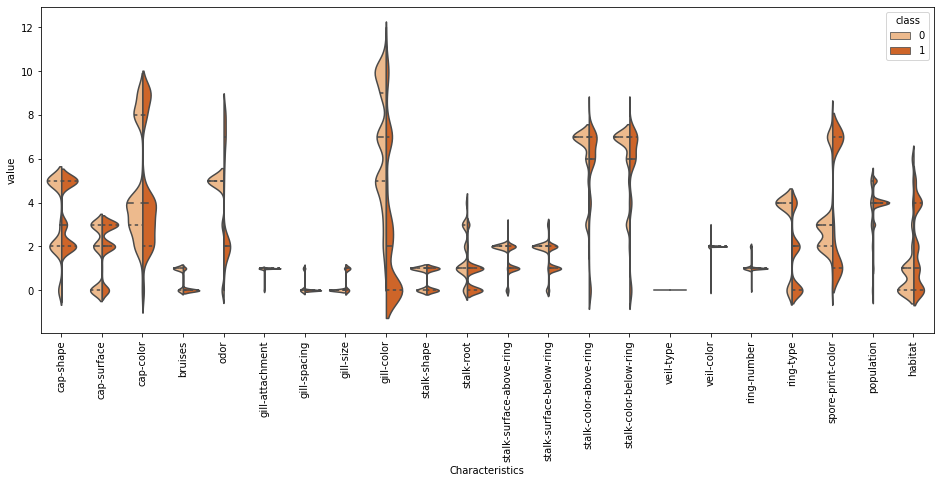

In [56]:
# violin plot
nurul_violin = pd.melt(nurul, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
plot_nurul = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, 
                            data=nurul_violin, inner = 'quartile', palette = 'Oranges')
nurul_selain_class = nurul.drop(["class"],axis = 1)
plot_nurul.set_xticklabels(rotation = 90, labels = list(nurul_selain_class.columns));

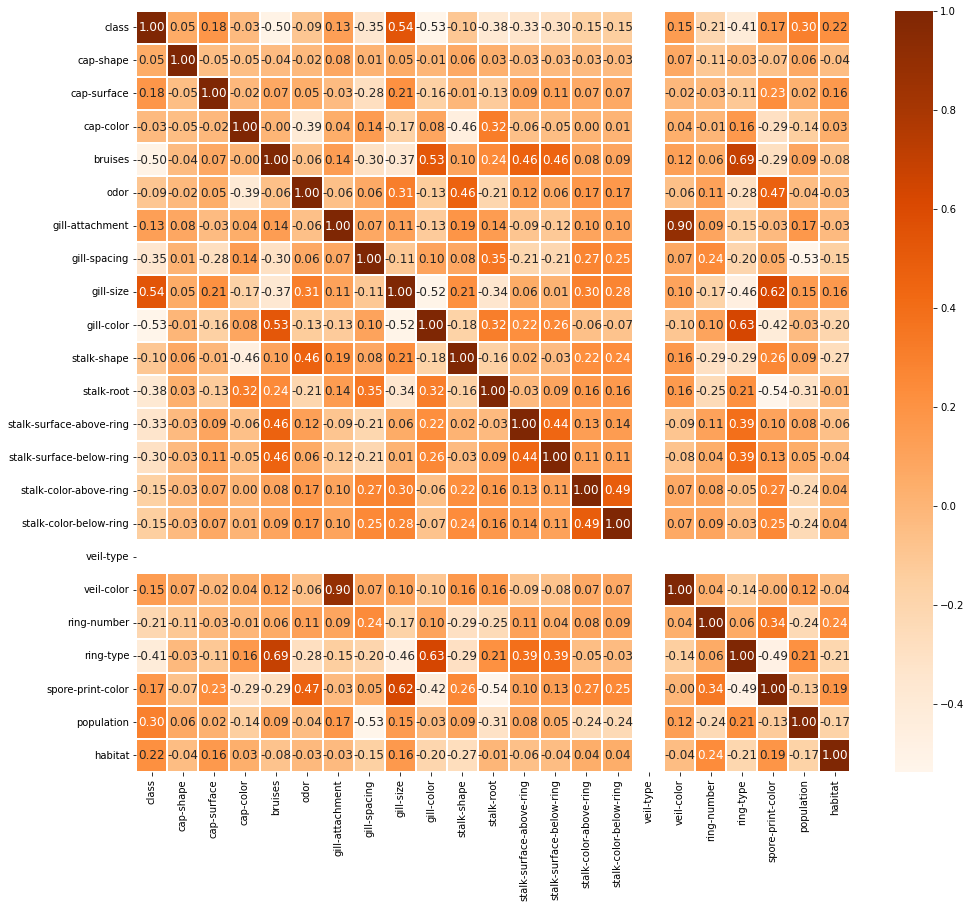

In [55]:
# plot untuk melihat korelasi antar feature
plt.figure(figsize=(16,14))
sns.heatmap(nurul.corr(),linewidths=.2,cmap="Oranges",fmt=".2f",annot=True, annot_kws={"size": 12})
plt.yticks(rotation=0);

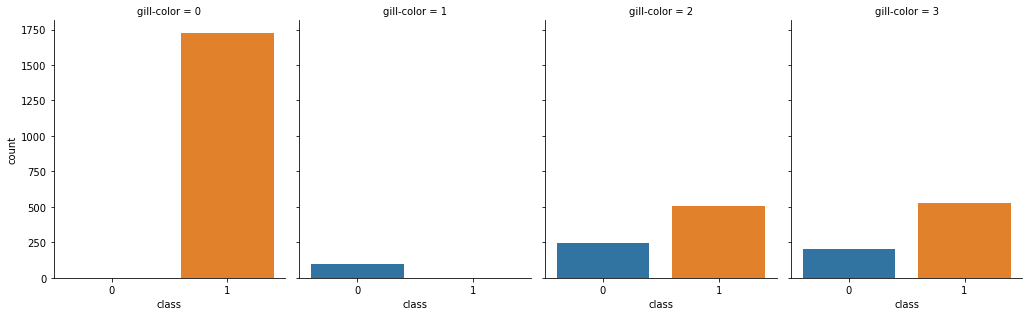

In [63]:
new_var = nurul[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);

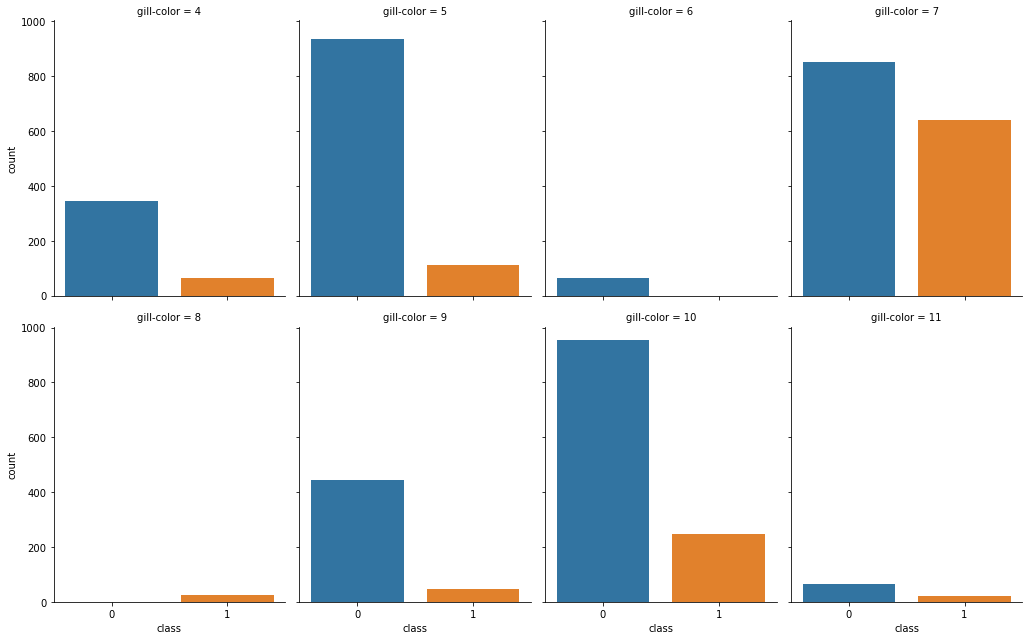

In [64]:
new_var=nurul[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]

sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);

# DATA PREPARATION

## MEMBAGI DATA TRAINING DAN DATA TESTING

In [65]:
X = nurul.drop(['class'], axis=1)  
y = nurul["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, stratify=y, random_state=42)

In [66]:
lb = LabelEncoder()
lb.fit(y_train)

LabelEncoder()

In [67]:
y_train

5249    1
5781    0
7586    0
6181    1
7338    1
       ..
6150    1
5386    0
1357    0
2977    0
2411    0
Name: class, Length: 6499, dtype: int32

In [68]:
y_test

4632    1
3444    1
1209    0
6880    1
4542    1
       ..
7554    1
3198    0
3850    0
1965    0
5718    1
Name: class, Length: 1625, dtype: int32

In [69]:
# standarisasi data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# MODELLING

## SUPPORT VECTOR MACHINE (SVM)

In [80]:
#KERNEL LINEAR
model = svm.SVC(kernel ='linear')
#train model pake data train
model.fit(X_train, y_train)
# predict data set pada data yang sudah ditraining
y_pred = model.predict(X_test)
print(y_pred)

[1 1 0 ... 0 0 1]


In [81]:
# model svm rbf
model2 = svm.SVC(kernel ='rbf')
#train model pake data train
model2.fit(X_train, y_train)
# predict data set pakai model sudah ditraining
y_pred2 = model2.predict(X_test)
print(y_pred2)

[1 1 0 ... 0 0 1]


In [82]:
# model svm polinomial
model3 = svm.SVC(kernel ='poly')
#train model pake data train
model3.fit(X_train, y_train)
# predict data set pakai model sudah ditraining
y_pred3 = model3.predict(X_test)
print(y_pred3)

[1 1 0 ... 0 0 1]


In [83]:
# EVALUASI MODEL
# model linear
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[826  16]
 [  4 779]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       842
           1       0.98      0.99      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



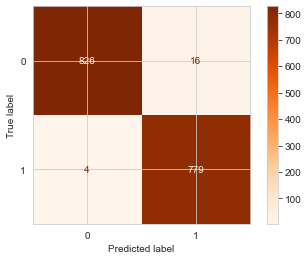

In [84]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=lb.classes_).plot(cmap = "Oranges")

In [85]:
# model rbf
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[842   0]
 [  0 783]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



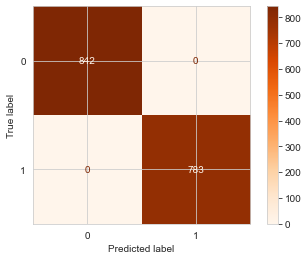

In [87]:
cm = confusion_matrix(y_test, y_pred2)
ConfusionMatrixDisplay(cm, display_labels=lb.classes_).plot(cmap = "Oranges")

In [88]:
# model polinomial
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[842   0]
 [  0 783]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



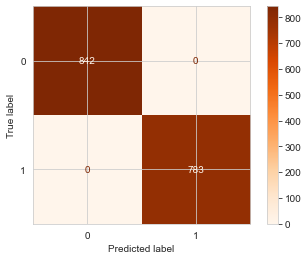

In [89]:
cm = confusion_matrix(y_test, y_pred3)
ConfusionMatrixDisplay(cm, display_labels=lb.classes_).plot(cmap = "Oranges")

In [94]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    svm.SVC(kernel ='linear'),
    svm.SVC(kernel ='rbf'),
    svm.SVC(kernel ='poly'),
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('*Results*')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

SVC
*Results*
Accuracy: 98.7692%
SVC
*Results*
Accuracy: 100.0000%
SVC
*Results*
Accuracy: 100.0000%


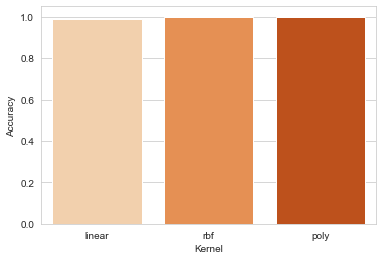

In [95]:
#Visualisasi Perbandingan Performa
kernels = ['linear', 'rbf', 'poly']
accuracy = [0.99, 1.00, 1.0]

#create barplot
sns.set_style("whitegrid")
sns.barplot(x=kernels, y=accuracy, palette='Oranges')

#set labels
plt.xlabel("Kernel")
plt.ylabel("Accuracy")

#show plot
plt.show()